In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Drug review dataset.csv')

In [3]:
df

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1
...,...,...,...,...
5274,5b5d129f3bab30fbb4740540a16856907657f005,"Hi Bee, Thanks for the update and the good new...",alimta,0
5275,1aa7dde5dc5249ebc3490c1fbac6ca6df48753a2,Have you had blood testing done to check your ...,entyvio,2
5276,e9159c3f836f453f5f133008d40b7e65f9e70a42,All the best to your husband and family.,opdivo,2
5277,63d57717bd0cf650f91a5137bd1b427ba922edea,"Hi bazza, luckily my eyes aren't so badly affe...",lucentis,2


In [4]:
df.isnull().sum()

,0
unique_hash,0
text,0
drug,0
sentiment,0


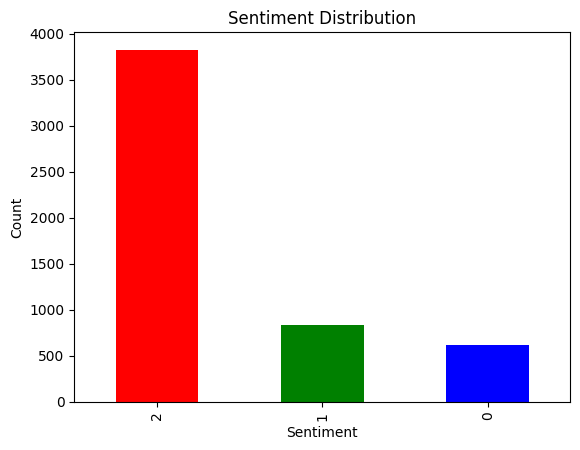

In [5]:
# Distribution of sentiments
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Number of Positive Mentions')

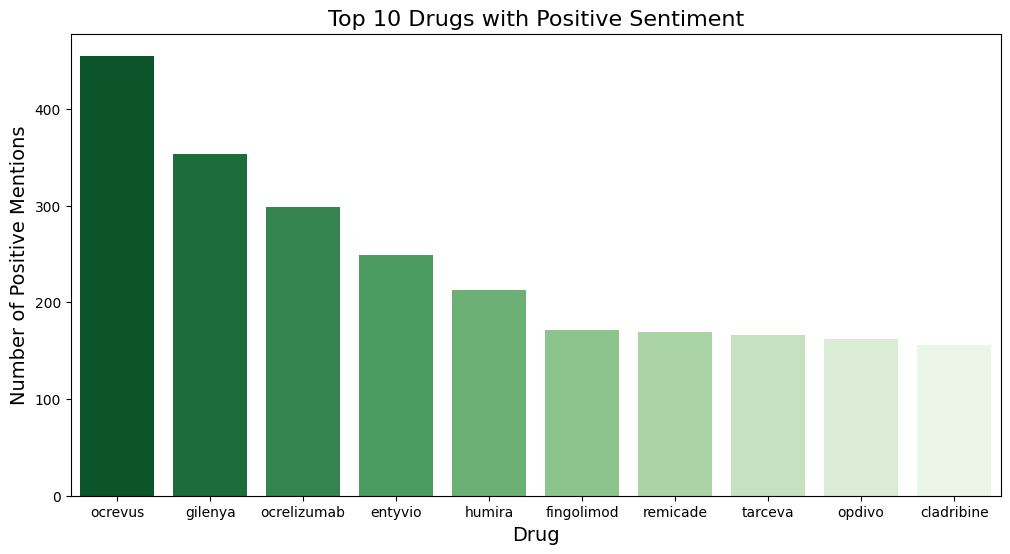

In [6]:
# Filter data for positive sentiment (sentiment = 2)
positive_data = df[df['sentiment'] == 2]

# Count the number of positive mentions for each drug
positive_drug_counts = positive_data['drug'].value_counts().head(10)  # Top 10 most mentioned drugs

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x=positive_drug_counts.index,
    y=positive_drug_counts.values,
    palette="Greens_r"  # Changed palette to Greens_r for positive sentiment
)
plt.title('Top 10 Drugs with Positive Sentiment', fontsize=16) # Changed title
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Number of Positive Mentions', fontsize=14) # Changed y-

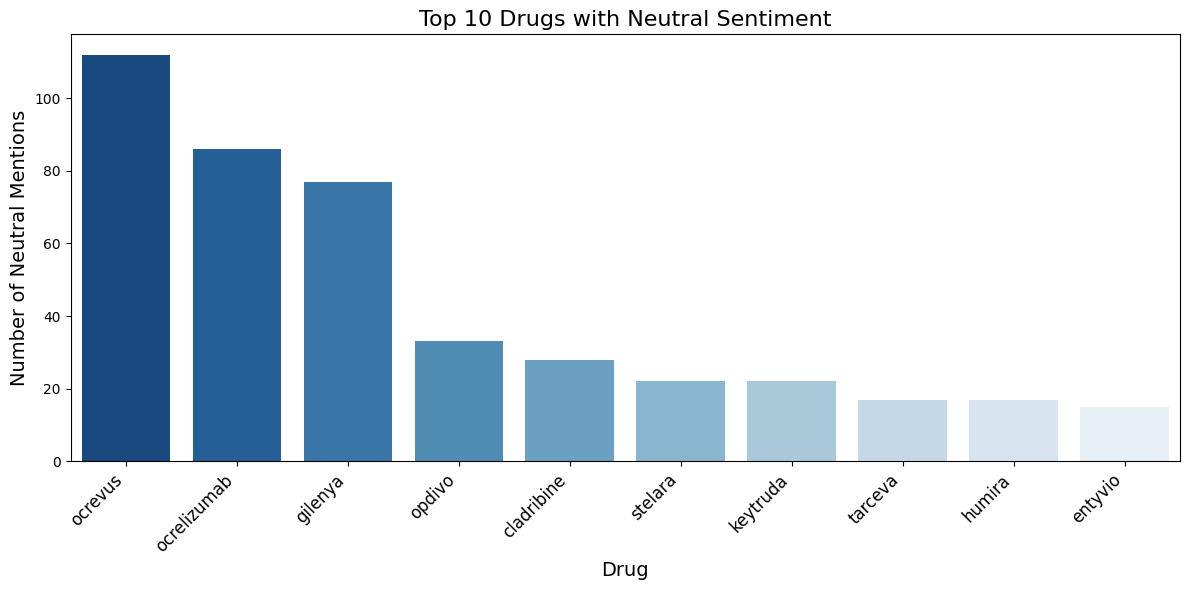

In [7]:
# Filter data for neutral sentiment (sentiment = 0)
neutral_data = df[df['sentiment'] == 0]

# Count the number of neutral mentions for each drug
neutral_drug_counts = neutral_data['drug'].value_counts().head(10)  # Top 10 most mentioned drugs

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x=neutral_drug_counts.index,
    y=neutral_drug_counts.values,
    palette="Blues_r"  # Changed palette to Blues_r for neutral sentiment
)
plt.title('Top 10 Drugs with Neutral Sentiment', fontsize=16) # Changed title
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Number of Neutral Mentions', fontsize=14) # Changed y-axis label
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

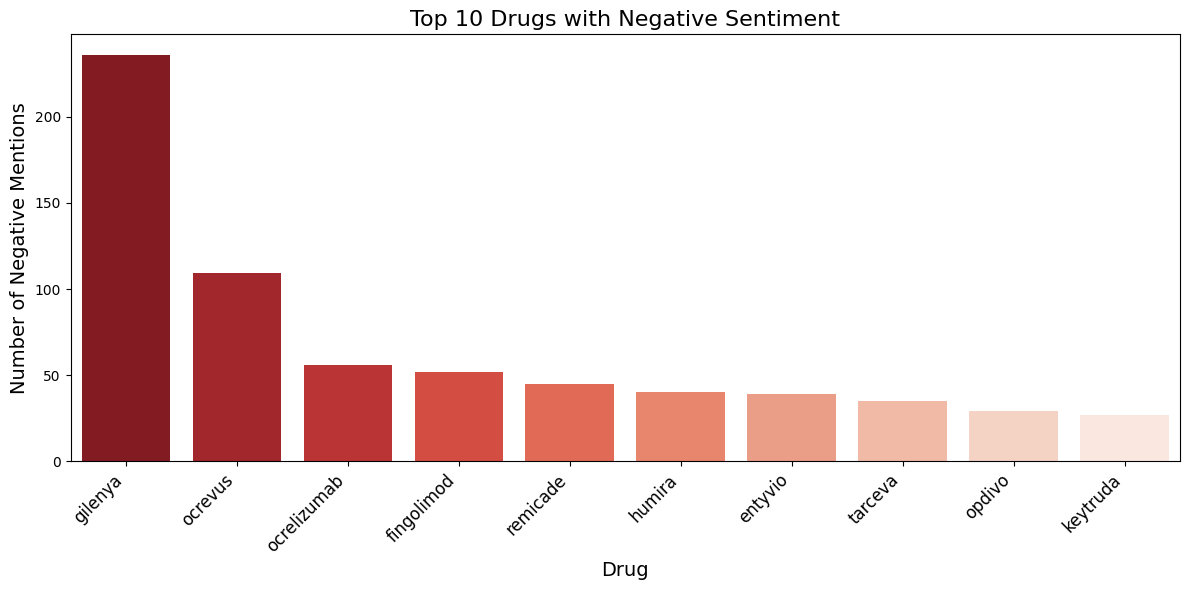

In [8]:
# Filter data for negative sentiment (sentiment = 1)
negative_data = df[df['sentiment'] == 1]

# Count the number of negative mentions for each drug
negative_drug_counts = negative_data['drug'].value_counts().head(10)  # Top 10 most mentioned drugs

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x=negative_drug_counts.index,
    y=negative_drug_counts.values,
    palette="Reds_r"
)
plt.title('Top 10 Drugs with Negative Sentiment', fontsize=16)
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Number of Negative Mentions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# word cloud

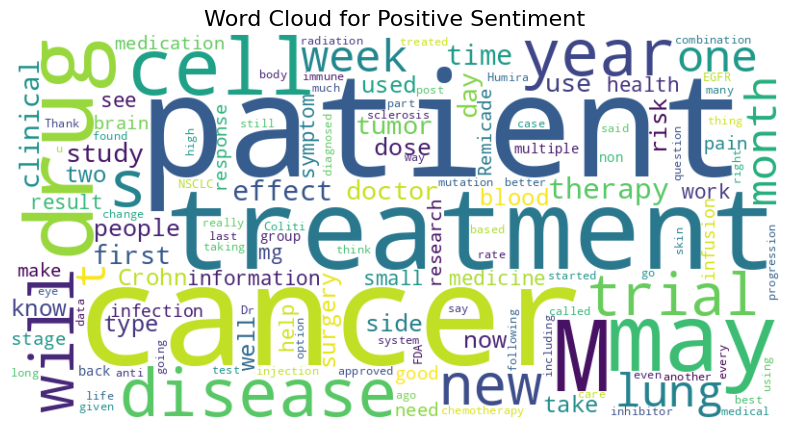

In [9]:
from wordcloud import WordCloud, STOPWORDS

# Filter data for positive sentiment (sentiment = 2)
positive_data = df[df['sentiment'] == 2]

# Combine all text data for positive sentiment
all_positive_text = ' '.join(positive_data['text'].astype(str).tolist())

# Create a WordCloud object with customized configuration
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200,  # Limit to top 200 words
    min_font_size=10,  # Minimum font size
    max_font_size=150,  # Maximum font size
    colormap='viridis',  # Use a colormap for better visual appeal
    collocations=False   # Avoid showing bigrams (word pairs)
).generate(all_positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment', fontsize=16)
plt.show()


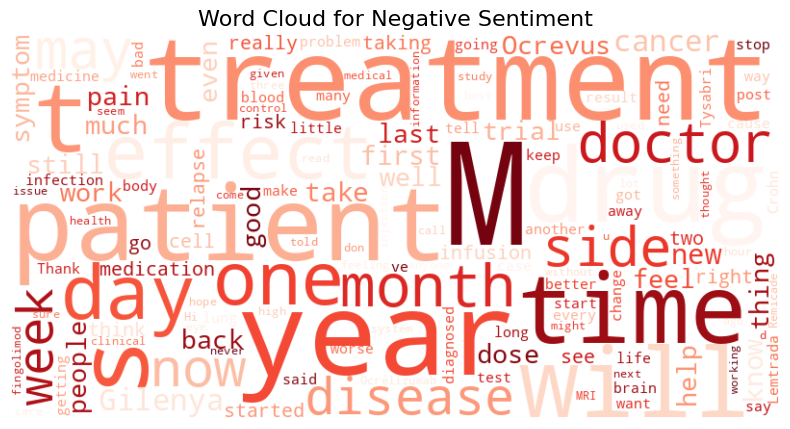

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Filter data for negative sentiment (sentiment = 1)
negative_data = df[df['sentiment'] == 1]  # Now sentiment 1 is negative

# Combine all text data for negative sentiment
all_negative_text = ' '.join(negative_data['text'].astype(str).tolist())

# Create a WordCloud object with customized configuration
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200,  # Limit to top 200 words
    min_font_size=10,  # Minimum font size
    max_font_size=150,  # Maximum font size
    colormap='Reds',  # Use a red colormap for negative sentiment
    collocations=False  # Avoid showing bigrams (word pairs)
).generate(all_negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment', fontsize=16)
plt.show()


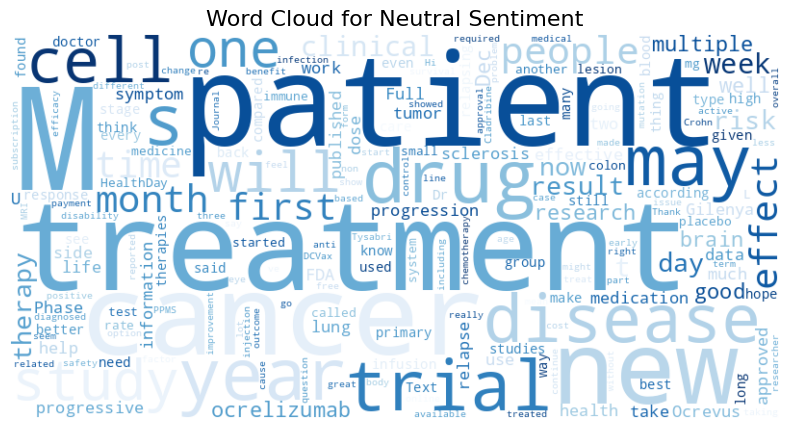

In [11]:

from wordcloud import WordCloud, STOPWORDS

# Filter data for neutral sentiment (sentiment = 0)
neutral_data = df[df['sentiment'] == 0]  # Now sentiment 0 is neutral

# Combine all text data for neutral sentiment
all_neutral_text = ' '.join(neutral_data['text'].astype(str).tolist())

# Create a WordCloud object with customized configuration
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200,  # Limit to top 200 words
    min_font_size=10,  # Minimum font size
    max_font_size=150,  # Maximum font size
    colormap='Blues',  # Use a blue colormap for neutral sentiment
    collocations=False  # Avoid showing bigrams (word pairs)
).generate(all_neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment', fontsize=16)
plt.show()

In [12]:
print(df['text'][4])

Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.


# Preprocessing the data

In [13]:
df.drop('unique_hash',inplace=True,axis=1)

In [14]:
df.columns


Index(['text', 'drug', 'sentiment'], dtype='object')

In [15]:
df['text'] = df['text'].str.lower()

In [16]:
# removing unnecessary symbols and characters
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [17]:
#remove punctuations
import string
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [18]:
#removing numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [19]:
# removing the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
#tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


# converting cleaned tokens to vectorization

In [22]:
# applying FastTextvec
from gensim.models import Word2Vec,FastText
model = FastText(sentences=df['tokens'], vector_size=300, window=5, min_count=2,sg=0)
# Example: Retrieve vector representation for a specific word
model.wv.most_similar('surgery', topn=5)












[('cryosurgery', 0.9837654232978821),
 ('surge', 0.975100576877594),
 ('surgeon', 0.9597687721252441),
 ('surg', 0.9568686485290527),
 ('postsurgery', 0.948696494102478)]

In [23]:
model.wv.most_similar('pain', topn=5)

[('painfatigue', 0.9379973411560059),
 ('paint', 0.9273013472557068),
 ('spain', 0.925396740436554),
 ('painful', 0.9189813137054443),
 ('headache', 0.9180119633674622)]

# Function to get the average word vector for a document

In [24]:
# Function to get the average word vector for a document
def get_avg_word_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        # If no in-vocabulary words are present, return a default vector (zeros in this case)
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors) # vector representation of sentence




# Getting avg vector for each

In [25]:
df['word_vectors'] = df['tokens'].apply(get_avg_word_vector)
df.head(10)

,text,drug,sentiment,tokens,word_vectors
0,autoimmune diseases tend come clusters gilenya...,gilenya,2,"[autoimmune, disease, tend, come, cluster, gil...","[0.18810257, 0.25753808, -0.2999743, -0.005051..."
1,completely understand youd want try results re...,gilenya,2,"[completely, understand, youd, want, try, resu...","[0.19557917, -0.03324789, -0.12583572, -0.1086..."
2,interesting targets sp receptors rather like f...,fingolimod,2,"[interesting, target, sp, receptor, rather, li...","[0.13566034, -0.024575487, 0.0011476997, -0.41..."
3,interesting grand merci wonder lemtrada ocrevu...,ocrevus,2,"[interesting, grand, merci, wonder, lemtrada, ...","[0.26076463, -0.09926126, -0.21329863, -0.0654..."
4,hi everybody latest mri results brain cervical...,gilenya,1,"[hi, everybody, latest, mri, result, brain, ce...","[0.18507166, 0.15248087, -0.08011118, -0.22200..."
5,cant give advice lemtrada chose cladribine tho...,cladribine,2,"[cant, give, advice, lemtrada, chose, cladribi...","[0.23468009, 0.018892031, -0.36929387, -0.1674..."
6,reply posted jesszidek hi jess sorry read chal...,humira,0,"[reply, posted, jesszidek, hi, jess, sorry, re...","[-0.023177035, 0.17842753, -0.11950118, -0.353..."
7,well expected neurologist wants start tysabri ...,gilenya,2,"[well, expected, neurologist, want, start, tys...","[0.3925718, 0.15801297, -0.24651507, 0.1489467..."
8,think fingolimod miserable failure progressive...,fingolimod,1,"[think, fingolimod, miserable, failure, progre...","[-0.04857279, -0.30491737, -0.011659018, -0.31..."
9,thank muchim learning lot grace mentioned husb...,tagrisso,2,"[thank, muchim, learning, lot, grace, mentione...","[-0.07008236, 0.19796003, -0.12842292, -0.0825..."


In [26]:
df['sentiment'].value_counts()

,count
sentiment,
2,3825
1,837
0,617


# Handling imbalanced data as my data is totally imbalanced and is not performing well.

In [27]:
from imblearn.over_sampling import RandomOverSampler
target = df['sentiment']
features = list(df['word_vectors'])

# Convert features to a proper 2D array
features = [vec for vec in features if vec is not None]
target = target[df['word_vectors'].notnull()]

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
features_resampled, target_resampled = over_sampler.fit_resample(features, target)

# Storing all in df_balanced_dataset.csv

In [28]:
# Combine the resampled features and target into a new DataFrame
df_balanced_data = pd.DataFrame({
    'word_vectors': [np.array(vec).tolist() for vec in features_resampled],  # Convert numpy arrays to lists
    'sentiment': target_resampled
})

# Save the balanced dataset to a CSV file
df_balanced_data.to_csv('df_balanced_dataset.csv', index=False)

print("Balanced dataset saved to 'df_balanced_dataset.csv'")

Balanced dataset saved to 'df_balanced_dataset.csv'


In [29]:
df_balanced_data['sentiment'].value_counts()

,count
sentiment,
2,3825
1,3825
0,3825


# Getting Avg Vector for each

In [30]:
# Function to calculate the average word vector for each document
def compute_average_word_vector(word_vectors):
    average_vectors = []
    for vec_list in word_vectors:
        # Convert the list of word vectors into a numpy array
        vec_array = np.array(vec_list)

        # Check if vec_array is not empty
        if vec_array.size > 0:
            # Calculate the average of word vectors for the document
            avg_vec = np.mean(vec_array, axis=0)
        else:
            # Handle empty vector list (optional, can be customized as needed)
            avg_vec = np.zeros(vec_list[0].shape)  # Assuming all word vectors are of the same shape

        average_vectors.append(avg_vec)

    return np.array(average_vectors)

# Apply the function to the 'w2v_vectors' column to get average word vectors
average_word_vectors = compute_average_word_vector(df_balanced_data['word_vectors'])

# Convert average_word_vectors into a DataFrame or use it directly for model fitting
# If you plan to use it for model fitting, ensure it's a 2D array
X = average_word_vectors  # Features (average word vectors)
y = df_balanced_data['sentiment']  # Target variable

# Now X is a 2D array (N x D) where N is the number of documents and D is the size of the word vector
print("Average word vectors computed and prepared for model fitting.")


Average word vectors computed and prepared for model fitting.


In [31]:
df_balanced_data

,word_vectors,sentiment
0,"[0.1881025731563568, 0.2575380802154541, -0.29...",2
1,"[0.1955791711807251, -0.03324789181351662, -0....",2
2,"[0.1356603354215622, -0.02457548677921295, 0.0...",2
3,"[0.26076462864875793, -0.09926126152276993, -0...",2
4,"[0.185071662068367, 0.1524808704853058, -0.080...",1
...,...,...
11470,"[0.12082644551992416, 0.1732938289642334, -0.0...",1
11471,"[0.21327514946460724, 0.11374132335186005, -0....",1
11472,"[-0.1944093257188797, 0.23927007615566254, -0....",1
11473,"[0.08779751509428024, 0.21733666956424713, -0....",1


# XGBoost Classifier

Training accuracy: 91.74%
Test accuracy: 84.36%
Overall model accuracy: 90.27%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       736
           1       0.81      0.93      0.87       767
           2       0.86      0.69      0.76       792

    accuracy                           0.84      2295
   macro avg       0.85      0.85      0.84      2295
weighted avg       0.85      0.84      0.84      2295



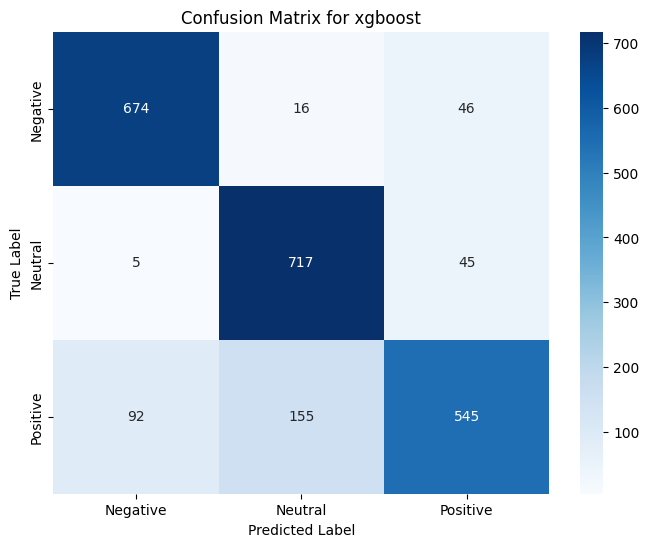

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42,alpha=0.1,n_estimator=500,learninig_rate=0.2, subsample=0.8, max_depth=3, colsample_bytree=0.8)
# Train the model using the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for xgboost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




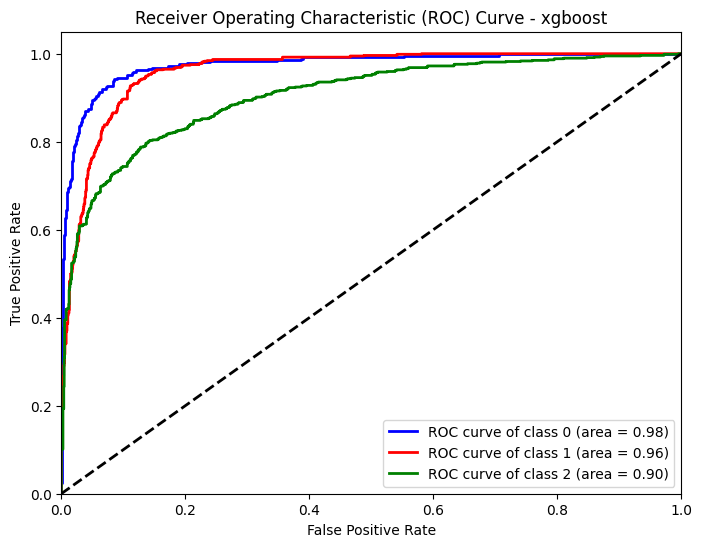

Micro-averaged ROC AUC score: 0.95
Macro-averaged ROC AUC score: 0.95


In [33]:
# Binarize the target variable for multi-class ROC AUC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = xgb_model.predict_proba(X_test)

# Calculate and plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - xgboost')
plt.legend(loc="lower right")
plt.show()

# Calculate and print micro-averaged ROC AUC score
micro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='micro')
print(f"Micro-averaged ROC AUC score: {micro_roc_auc:.2f}")

# Calculate and print macro-averaged ROC AUC score
macro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')
print(f"Macro-averaged ROC AUC score: {macro_roc_auc:.2f}")


# Decision Tree Classfier

Training accuracy: 91.88%
Test accuracy: 82.43%
Overall model accuracy: 89.52%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       949
           1       0.79      0.93      0.85       942
           2       0.90      0.64      0.75       978

    accuracy                           0.82      2869
   macro avg       0.83      0.83      0.82      2869
weighted avg       0.84      0.82      0.82      2869



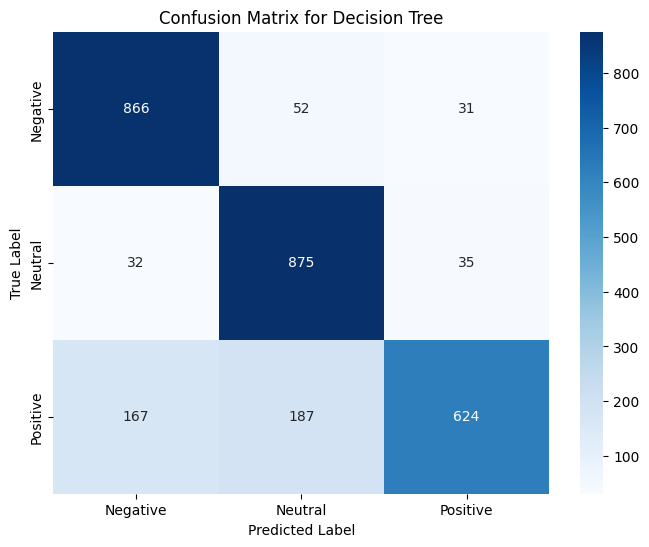

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score


# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree classifier
# Removed n_estimators as it's not a valid parameter for DecisionTreeClassifier
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # Splitting criterion ('gini' or 'entropy')
    max_depth=12,     # Maximum depth of the tree (None means no limit)
    random_state=44,    # Random state for reproducibility
    class_weight='balanced',
)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

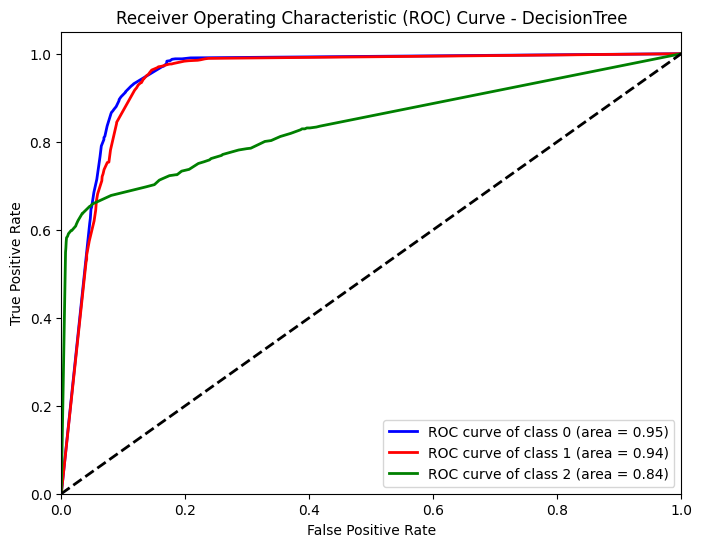

Micro-averaged ROC AUC score: 0.92
Macro-averaged ROC AUC score: 0.91


In [58]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = dt_model.predict_proba(X_test)

# Calculate and plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DecisionTree')
plt.legend(loc="lower right")
plt.show()

# Calculate and print micro-averaged ROC AUC score
micro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='micro')
print(f"Micro-averaged ROC AUC score: {micro_roc_auc:.2f}")

# Calculate and print macro-averaged ROC AUC score
macro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')
print(f"Macro-averaged ROC AUC score: {macro_roc_auc:.2f}")


# Random Forest Classifier

Training accuracy: 93.10%
Test accuracy: 86.06%
Overall model accuracy: 91.69%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       782
           1       0.79      0.94      0.86       763
           2       0.91      0.71      0.80       750

    accuracy                           0.86      2295
   macro avg       0.87      0.86      0.86      2295
weighted avg       0.87      0.86      0.86      2295



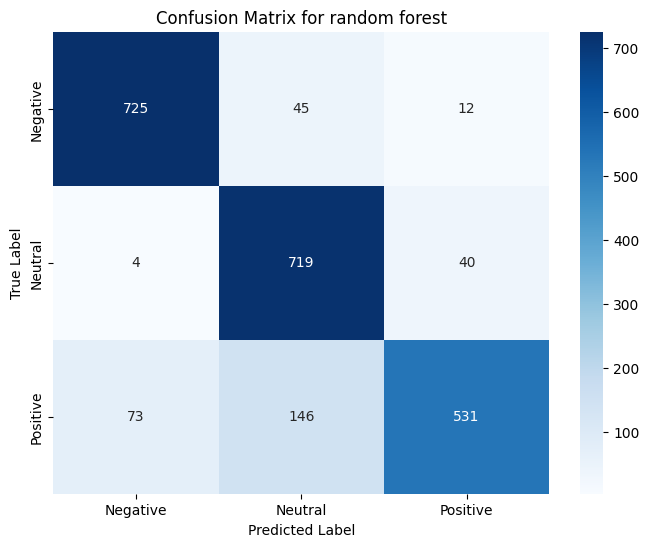

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score


# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(df_balanced_data['word_vectors'].tolist())  # Convert list of vectors to 2D array
y = df_balanced_data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=500,        # Number of trees in the forest
    criterion='gini',        # Splitting criterion ('gini' or 'entropy')
    max_depth=9,            # Maximum depth of the trees
    random_state=42,         # Random state for reproducibility
    class_weight='balanced', # Handle class imbalance
    n_jobs=-1                # Use all available cores for training
)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for random forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




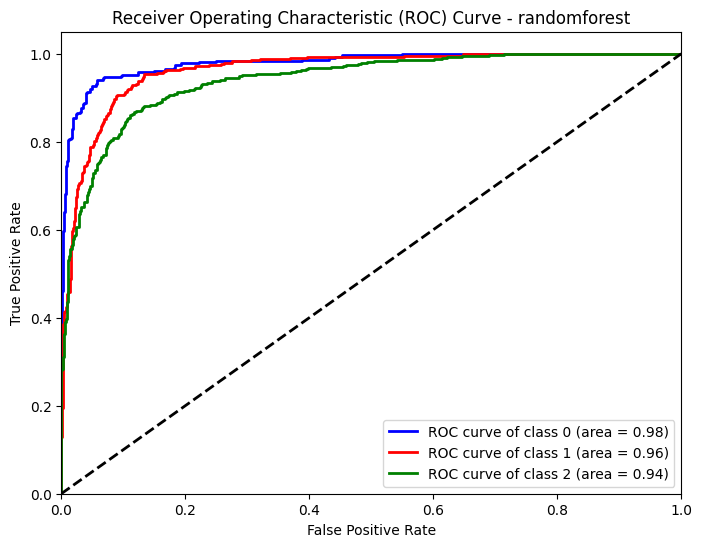

Micro-averaged ROC AUC score: 0.96
Macro-averaged ROC AUC score: 0.96


In [37]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = rf_model.predict_proba(X_test)

# Calculate and plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - randomforest')
plt.legend(loc="lower right")
plt.show()

# Calculate and print micro-averaged ROC AUC score
micro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='micro')
print(f"Micro-averaged ROC AUC score: {micro_roc_auc:.2f}")

# Calculate and print macro-averaged ROC AUC score
macro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')
print(f"Macro-averaged ROC AUC score: {macro_roc_auc:.2f}")


                Model  Training Accuracy  Testing Accuracy  Overall Accuracy
0       Random Forest              93.38             86.06             92.02
1  XGBoost Classifier              91.39             84.62             90.04
2       Decision Tree              91.88             82.43             89.52


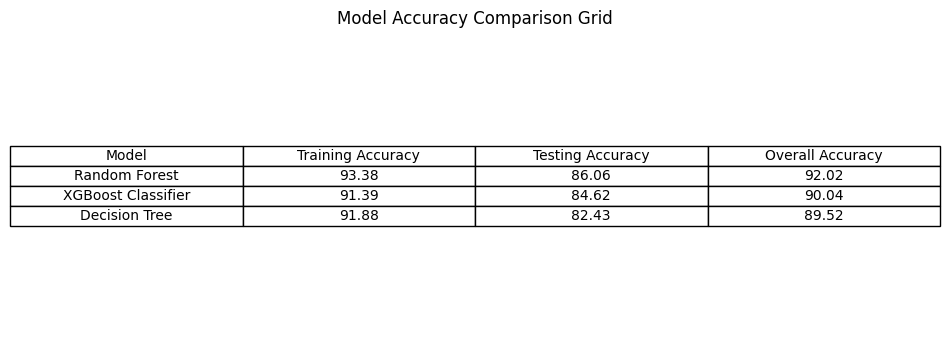

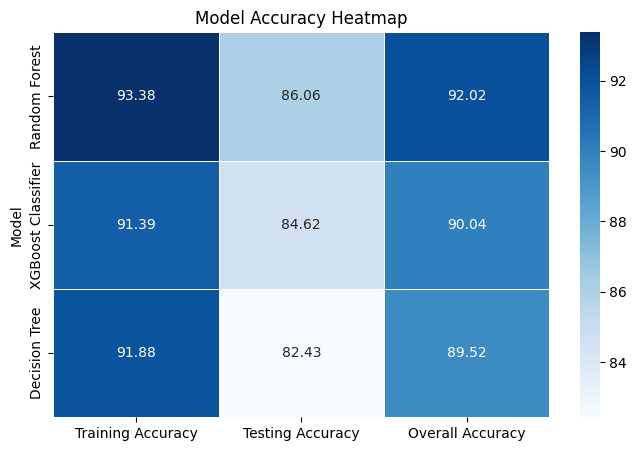

In [59]:
model_data = {
    'Model': [ 'XGBoost Classifier','Decision Tree', 'Random Forest'],
    'Training Accuracy': [91.39,91.88,93.38],
    'Testing Accuracy': [84.62,82.43,86.06],
    'Overall Accuracy': [90.04,89.52,92.02]
}
# Creating a DataFrame and sorting
accuracy_df = pd.DataFrame(model_data)
accuracy_df_sorted = accuracy_df.sort_values(by='Overall Accuracy', ascending=False).reset_index(drop=True)

# Display sorted table as text
print(accuracy_df_sorted)

# Plot the table in grid format
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size for better appearance
ax.axis('tight')
ax.axis('off')

# Create a table
table_data = [accuracy_df_sorted.columns.tolist()] + accuracy_df_sorted.values.tolist()
table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Styling the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

# Title
plt.title("Model Accuracy Comparison Grid", fontsize=12)
plt.show()

# Heatmap visualization for better comparison
plt.figure(figsize=(8, 5))
sns.heatmap(accuracy_df_sorted.set_index('Model'), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Model Accuracy Heatmap")
plt.show()


# conclusion : Random forest model achieved highest overall accuracy for this dataset




# predicting on the old data using random forest

In [76]:
 df['sentiment'][5274]

0

In [73]:
df['text'][5274]

'hi bee thanks update good news scan hard say effective alimta regard preventing treating brain mets seems worked well otherwise mom say would tough choice change treatment course clear evidence alimta longer effective also possible disease seen brain could locally treated alimta resumed assuming still effective elsewhere good youre researching options agree staying course point makes lot sense keep good updates coming jimc forum moderator jul wife liz never smoker dx stage iv nsclc egfr exon cycles carboalimta shrinkage tarceva maintenance mar progression added alimta stable sep multiple brain mets wbr oct large pericardial effusion tamponade jan progression start abraxane jun new liver brain mets add tarceva oct dx leptomeningeal carcinomatosis pulsed tarceva rest nov since httpcancergraceorgblogjimandlisa'

In [67]:

# Function to preprocess new text data
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "hi bee thanks update good news scan hard say effective alimta regard preventing treating brain mets seems worked well otherwise mom say would tough choice change treatment course clear evidence alimta longer effective also possible disease seen brain could locally treated alimta resumed assuming still effective elsewhere good youre researching options agree staying course point makes lot sense keep good updates coming jimc forum moderator jul wife liz never smoker dx stage iv nsclc egfr exon cycles carboalimta shrinkage tarceva maintenance mar progression added alimta stable sep multiple brain mets wbr oct large pericardial effusion tamponade jan progression start abraxane jun new liver brain mets add tarceva oct dx leptomeningeal carcinomatosis pulsed tarceva rest nov since httpcancergraceorgblogjimandlisa"

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Neutral


the given text is taken from my own data set and it is predicted neutral(0) whaich is same as there in my own data set

# Predicting on the new data

In [77]:
# Function to preprocess new text data
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "I'm feeling much better after taking this drug."

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = rf_model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
sentiment_labels = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}
predicted_sentiment_label = sentiment_labels[predicted_sentiment]

print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Positive
